In [1]:
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.python.keras.utils import np_utils
from keras.models import Sequential
from keras.utils import array_to_img, img_to_array, load_img
from keras.layers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score

In [2]:
path = r"C:\\Users\\angel\\Desktop\\font_original" #원본 이미지 경로 
copy_path = r"C:\\Users\\angel\\Desktop\\font_classifier" #복사 및 분류된 이미지 경로
#font_classifier 안에 모든 글꼴 이미지들이 다 저장되어 있음 (따로 하위폴더 없음)
#노트북 경로

### 데이터셋 준비

In [8]:
import splitfolders

splitfolders.ratio(path, output=copy_path, seed = 43, ratio = (.5,.2,.3))

In [3]:
print(len(os.listdir(copy_path + '\\val')))
print(len(os.listdir(copy_path + '\\train')))
print(len(os.listdir(copy_path + '\\test')))

9
9
9


### 데이터셋 정형화

In [4]:
trainDataGen = ImageDataGenerator(rescale=1./255)

In [5]:
currentPath = copy_path + '\\train'

In [6]:
trainGenSet = trainDataGen.flow_from_directory(
    currentPath,
    batch_size=64,
    target_size=(28,28),
    class_mode='categorical'
)

Found 50274 images belonging to 9 classes.


-------------

In [7]:
valDataGen = ImageDataGenerator(rescale=1./255)

In [8]:
currentPath = copy_path + '\\val'

In [9]:
valGenSet = valDataGen.flow_from_directory(
    currentPath,
    batch_size=64,
    target_size=(28,28),
    class_mode='categorical'
)

Found 20106 images belonging to 9 classes.


---------------------

In [10]:
testDataGen = ImageDataGenerator(rescale=1./255,
                                 rotation_range = 30,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=False,
                                 vertical_flip=False,
                                 fill_mode='nearest'
                                 )

In [11]:
currentPath = copy_path + '\\test'

In [12]:
testGenSet = testDataGen.flow_from_directory(
    currentPath,
    batch_size=64,
    target_size=(28,28),
    class_mode='categorical'
)

Found 30168 images belonging to 9 classes.


--------

### 모델 구성

In [17]:
# 모델 구성
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape=(28,28,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
    
model.add(Conv2D(128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(9, activation='softmax'))  #18로 되어있었는데, 출력 라벨을 바꿔야 할 거 같은 구글링 결과가 나와서 바꿔봄...! => 성공!!! (validation, train의 라벨이 다 같아야 함!!)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 128)        

### 모델 훈련

In [19]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
results = model.fit(
    trainGenSet,
    steps_per_epoch=40,
    epochs=100,
    validation_data=valGenSet,
    validation_steps=20
)

Epoch 1/100
40/40 [==============================] - 12s 270ms/step - loss: 1.9602 - accuracy: 0.2062 - val_loss: 1.3965 - val_accuracy: 0.3445
Epoch 2/100
40/40 [==============================] - 10s 248ms/step - loss: 1.2378 - accuracy: 0.4395 - val_loss: 0.8963 - val_accuracy: 0.6719
Epoch 3/100
40/40 [==============================] - 9s 232ms/step - loss: 0.9014 - accuracy: 0.6004 - val_loss: 0.6019 - val_accuracy: 0.7797
Epoch 4/100
40/40 [==============================] - 9s 226ms/step - loss: 0.7092 - accuracy: 0.6949 - val_loss: 0.4665 - val_accuracy: 0.8391
Epoch 5/100
40/40 [==============================] - 9s 218ms/step - loss: 0.5902 - accuracy: 0.7500 - val_loss: 0.4271 - val_accuracy: 0.8680
Epoch 6/100
40/40 [==============================] - 9s 213ms/step - loss: 0.3944 - accuracy: 0.8418 - val_loss: 0.2408 - val_accuracy: 0.9266
Epoch 7/100
40/40 [==============================] - 9s 212ms/step - loss: 0.3766 - accuracy: 0.8594 - val_loss: 0.2506 - val_accuracy: 0.90

Epoch 58/100
40/40 [==============================] - 6s 153ms/step - loss: 0.0217 - accuracy: 0.9914 - val_loss: 0.0104 - val_accuracy: 0.9961
Epoch 59/100
40/40 [==============================] - 6s 151ms/step - loss: 0.0236 - accuracy: 0.9914 - val_loss: 0.0093 - val_accuracy: 0.9961
Epoch 60/100
40/40 [==============================] - 6s 149ms/step - loss: 0.0285 - accuracy: 0.9902 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 61/100
40/40 [==============================] - 6s 159ms/step - loss: 0.0173 - accuracy: 0.9930 - val_loss: 0.0067 - val_accuracy: 0.9984
Epoch 62/100
40/40 [==============================] - 6s 148ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 63/100
40/40 [==============================] - 6s 147ms/step - loss: 0.0077 - accuracy: 0.9973 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 64/100
40/40 [==============================] - 6s 142ms/step - loss: 0.0226 - accuracy: 0.9926 - val_loss: 0.0171 - val_accuracy:

### 모델 accuracy, loss 그래프로 표현

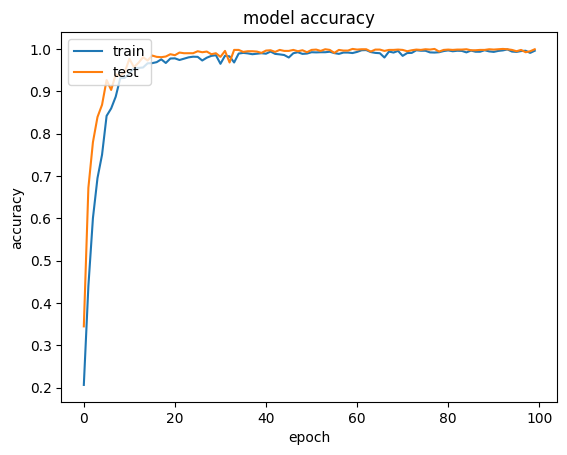

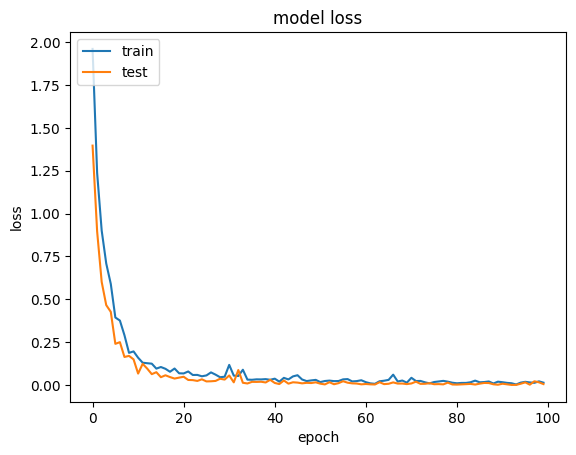

In [21]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 모델 테스트 및 정확도 출력 

In [22]:
scores = model.evaluate_generator(testGenSet)
print(scores)

C:\Users\angel\AppData\Local\Temp\ipykernel_8124\3026207986.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(testGenSet)


[3.1685945987701416, 0.4576040804386139]
